This is an analysis of the "réserve parlementaire" in 2015, an amount of money that members of the french parliament can freely use.

Data are from http://www2.assemblee-nationale.fr/reserve_parlementaire/plf (on the right → download CSV file).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re
%matplotlib inline
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 150

def minimal_hbar(ss, figsize=(6,3)):
    tot = ss.values
    labels = ss.index.get_values()
    labelAsX = np.arange(len(labels))+1
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(labelAsX, ss.values, align='center', color='grey')
    ax.set_yticks(labelAsX)
    ax.set_yticklabels(labels, fontsize=12)
    ax.set_ylim(0, labelAsX[-1]+1)
    ax.set_xlim(0, max(ss.values*1.15))
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_xlabel('Montant [€]')
    ax.grid(axis='x')
    plt.setp(ax.get_yticklines(), visible=False)

    return fig, ax

Loading the data...

In [2]:
main_df = pd.read_csv('reserve_parlementaire.csv',
                      sep=';', skipfooter=1, engine='python', skipinitialspace=True)
main_df.columns

Index(['nom', 'prenom', 'groupe', 'beneficiaire', 'adresse', 'descriptif',
       'programme_budgetaire', 'montant', 'observations'],
      dtype='object')

Cleaning data...

In [3]:
def sanitize_txt(data):
    """ This function remove extra spaces, accents and capital letters."""
    data = re.sub(' +', ' ', data) #remove extra spaces
    data = re.sub('^ +', '', data) # remove first space
    data = re.sub(' +$', '', data) # remove last space
    data = data.lower()
    data = data.replace('é', 'e').replace('à', 'a')
    ### misc
    data = data.replace('groupe ', '')
    data = data.replace('app ', '')
    return data 
san_main_df = main_df.copy()
san_main_df['groupe'] = main_df.groupe.dropna().apply(sanitize_txt)

# Total (in €) per group

groupe
deputes non inscrits                                1205999.0
gauche democrate et republicaine                    2051610.0
radical, republicain, democrate et progressiste     2249466.0
ecologiste                                          2769943.0
union des democrates et independants                3989811.0
les republicains                                   26190779.0
socialiste, republicain et citoyen                 39994841.0
Name: montant, dtype: float64

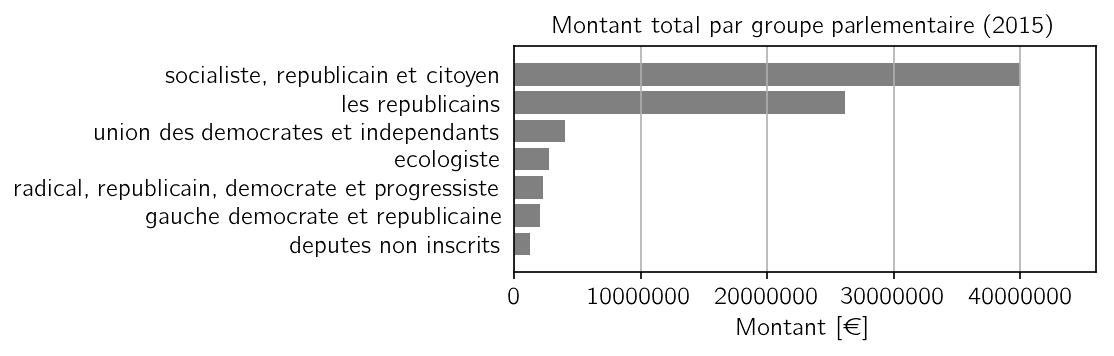

In [4]:
name_gb = san_main_df.groupby(['groupe'])
tot_groupe = name_gb.montant.aggregate(np.sum).sort_values(ascending=1)
fig, ax = minimal_hbar(tot_groupe, figsize=(5,2))
ax.set_title('Montant total par groupe parlementaire (2015)')
tot_groupe

# Total (in €) per beneficiary

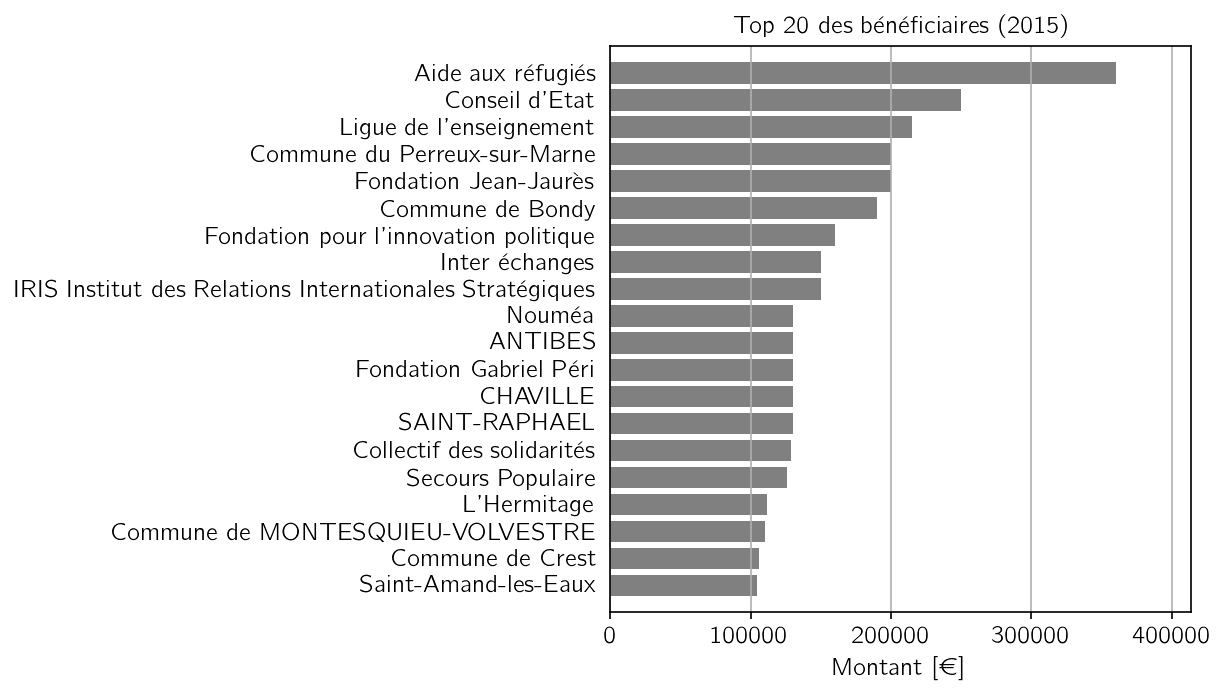

In [5]:
name_gb = san_main_df.groupby(['beneficiaire'])
tot_bene = name_gb.montant.aggregate(np.sum).sort_values(ascending=1).iloc[-20:]
fig, ax = minimal_hbar(tot_bene, figsize=(5,5))
ax.set_title('Top 20 des bénéficiaires (2015)')

# Total (in €) per member of the parliament

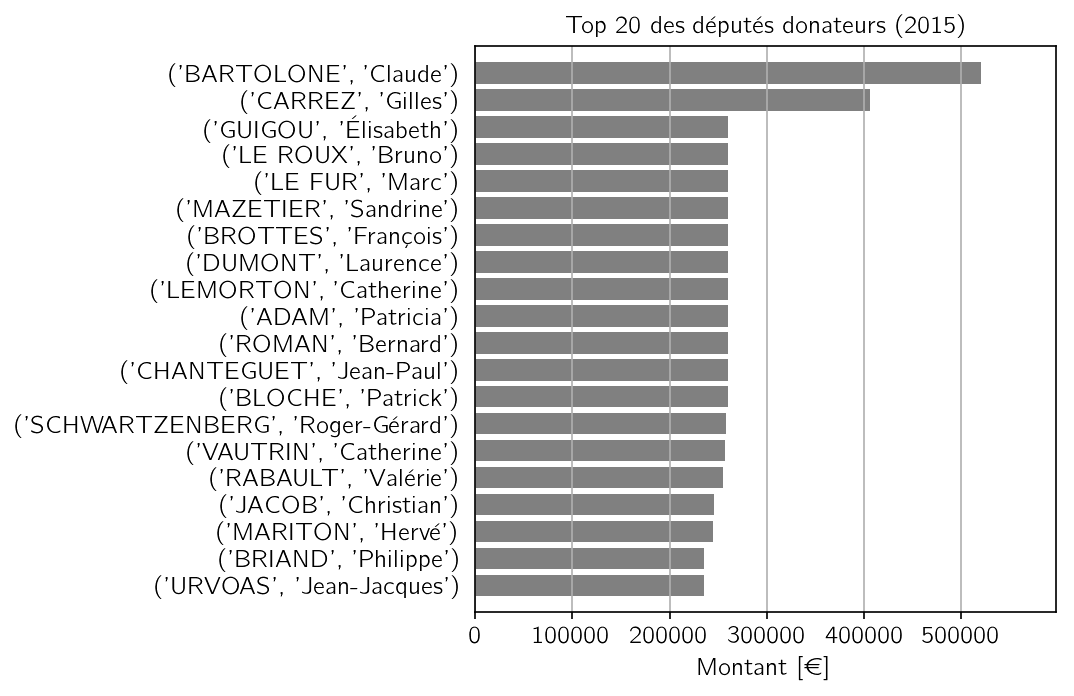

In [6]:
name_gb = san_main_df.groupby(['nom', 'prenom'])
tot_depu = name_gb.montant.aggregate(np.sum).sort_values(ascending=1).iloc[-20:]
fig, ax = minimal_hbar(tot_depu, figsize=(5,5))
ax.set_title('Top 20 des députés donateurs (2015)')